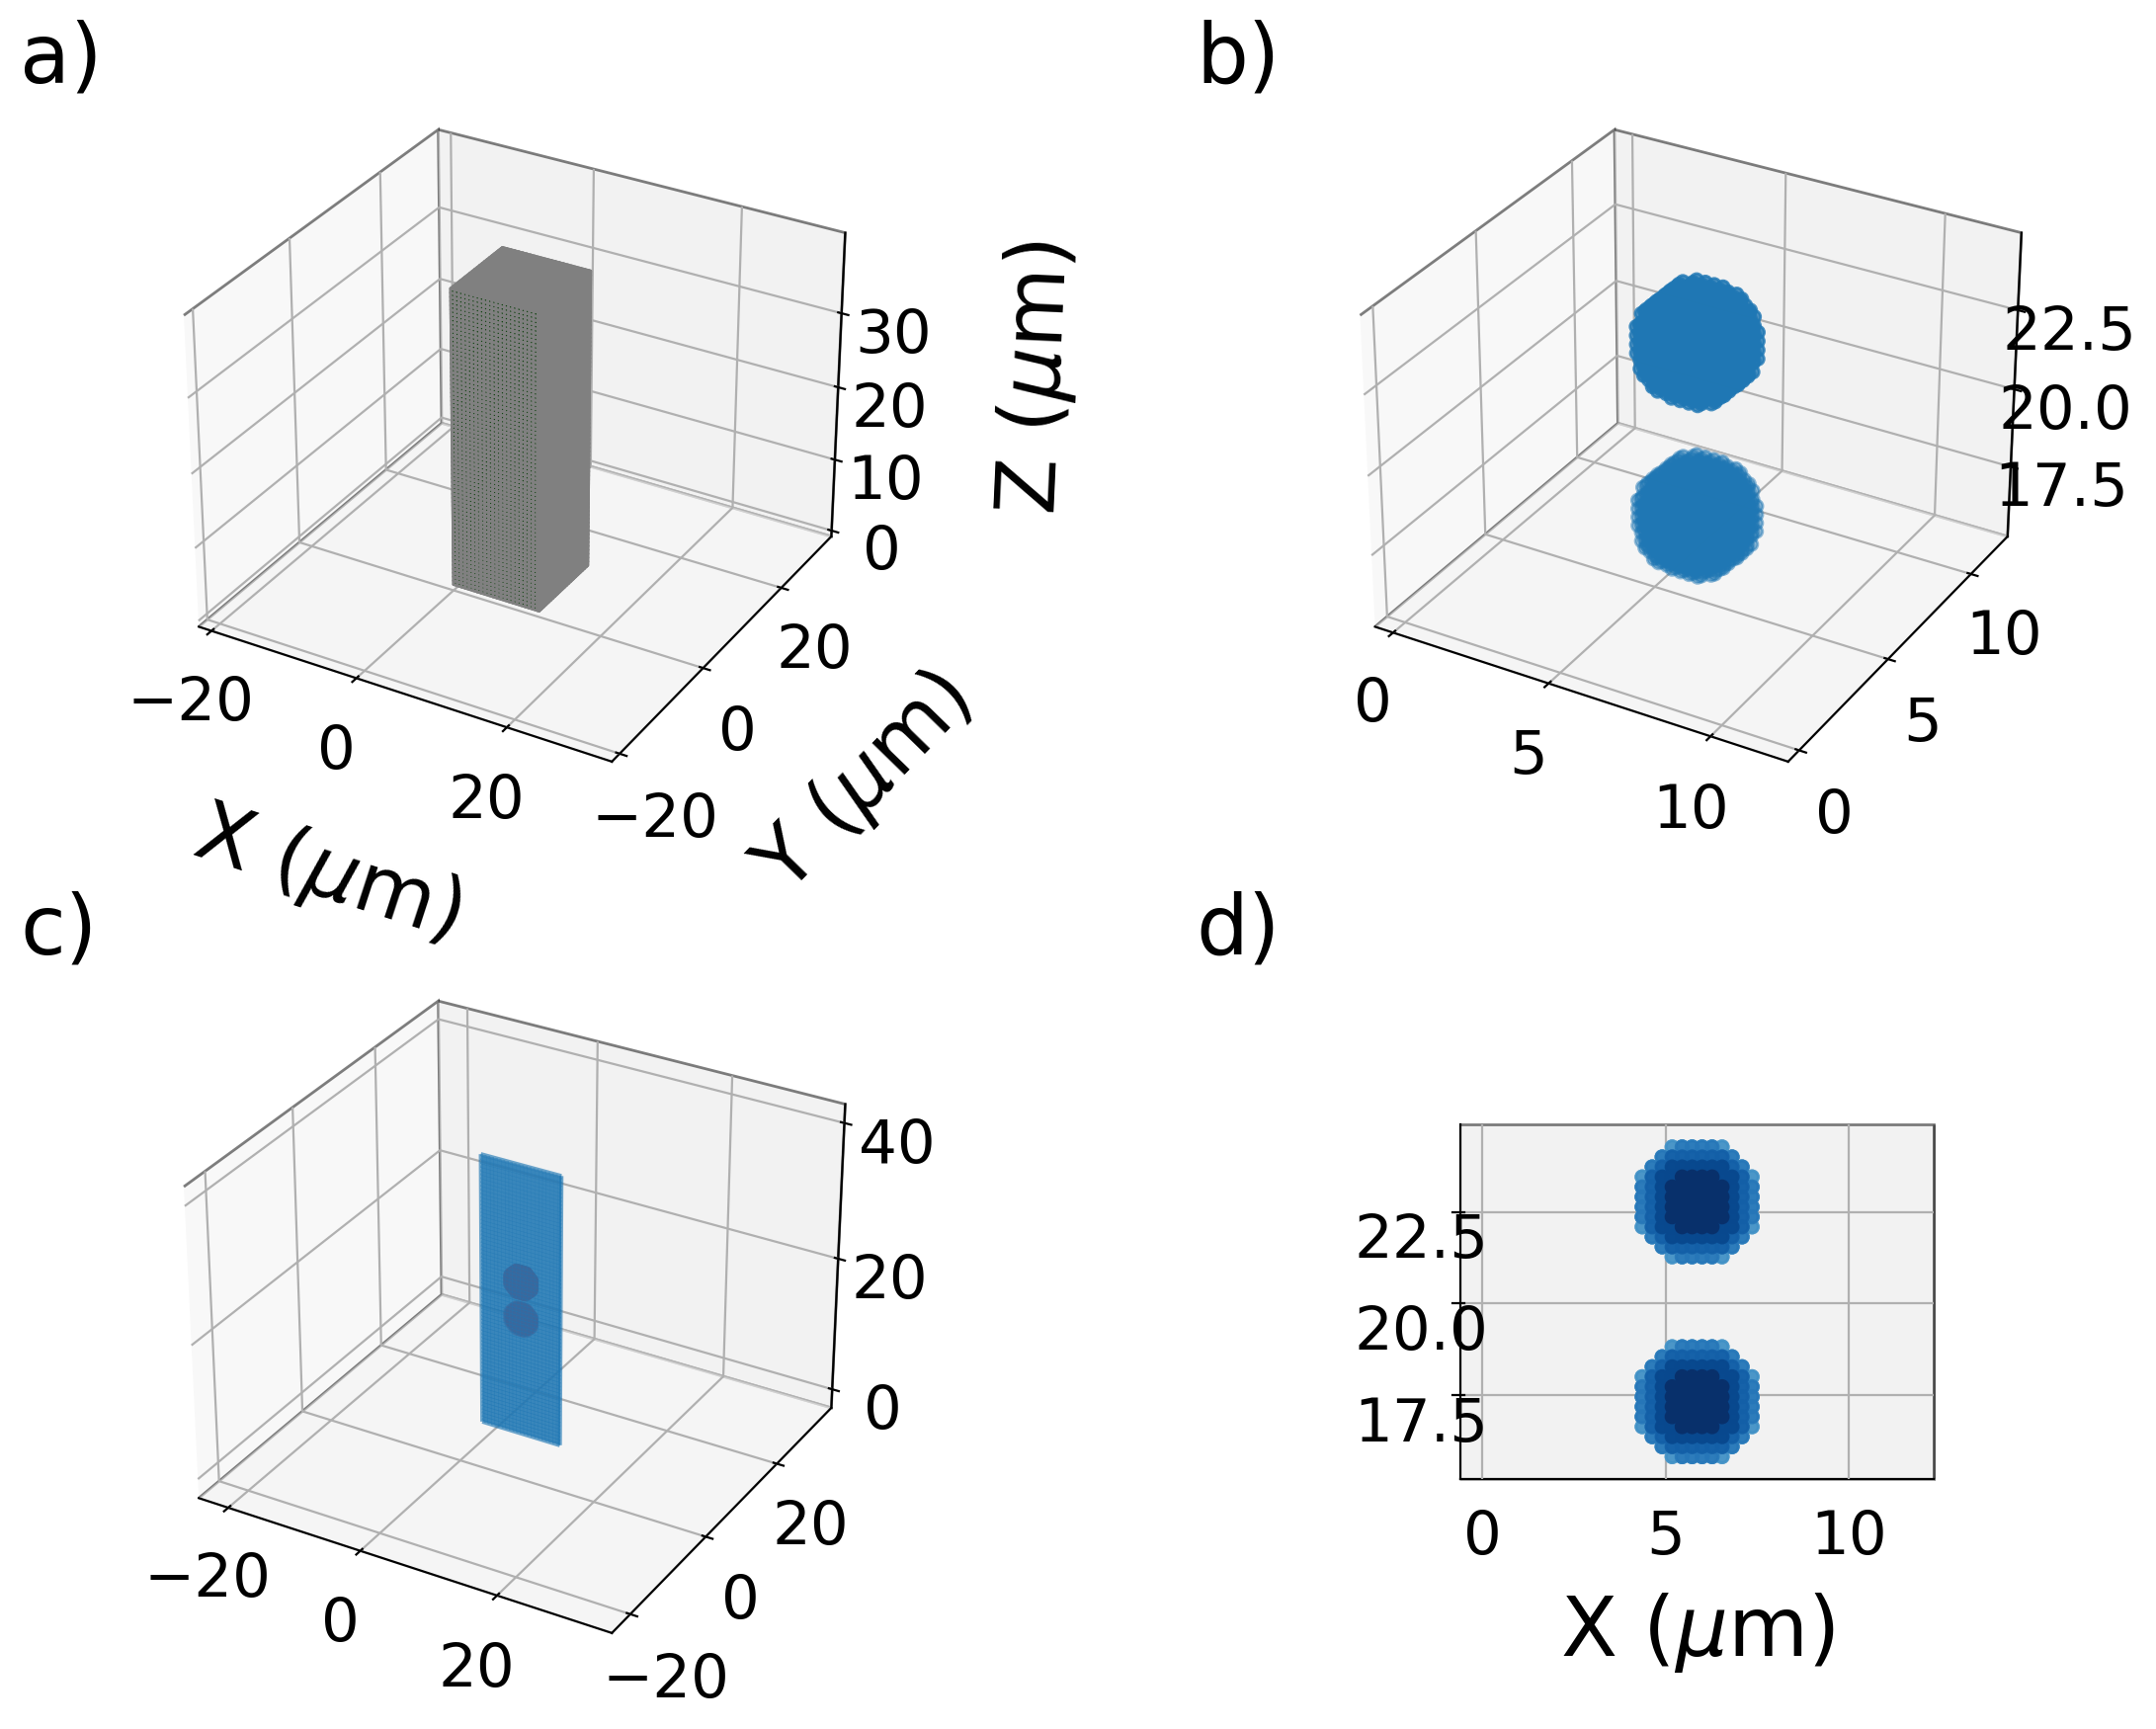

In [38]:
#2024-12-13 David Marchfield. combining different figure types showing the initial configuration of the system to make a single figure
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mre.analyze
import mre.initialize

def plot_particle_nodes(eq_node_posns,node_posns,l_e,particles,view,ax=None):
    """Plot a scatter plot showing the nodes making up the particles"""
    Lx = eq_node_posns[:,0].max()
    Ly = eq_node_posns[:,1].max()
    Lz = eq_node_posns[:,2].max()
    xlabel = r'X ($\mu$m)'
    ylabel = r'Y ($\mu$m)'
    zlabel = r'Z ($\mu$m)'

    axis_limit_max = np.max(np.array([Lx,Ly,Lz]))*1.1*l_e*1e6

    xlim = (-0.1*l_e*1e6,axis_limit_max)
    ylim = (-0.1*l_e*1e6,axis_limit_max)
    zlim = (-0.1*l_e*1e6,axis_limit_max)
    if type(ax) == type(None):
        fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
        default_width,default_height = fig.get_size_inches()
        fig.set_size_inches(2*default_width,2*default_height)
        fig.set_dpi(200)
    particles = np.ravel(particles)
    # my_cmap = matplotlib.colormaps['Blues']
    local_node_posns = node_posns.copy()
    local_node_posns *= l_e*1e6    
    # ax.axis('equal')
    if view == 'default':
        ax.scatter(local_node_posns[particles,0],local_node_posns[particles,1],local_node_posns[particles,2])
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(zlim)
        ax.axis('equal')
        # ax.set_xlabel(xlabel)
        # ax.set_ylabel(ylabel)
        # ax.set_zlabel(zlabel)
        mre.analyze.format_figure_3D(ax)
    elif view == 'xy':
        ax.scatter(local_node_posns[particles,0],local_node_posns[particles,1],local_node_posns[particles,2],cmap='Blues',c=local_node_posns[particles,2])
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(zlim)
        ax.axis('equal')
        ax.set_proj_type('ortho')
        angles = (90,-90,0)
        ax.view_init(angles[0],angles[1],angles[2])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        ax.set_zlabel('')
        ax.set_zticks([])
        ax.set_aspect('equal')
        mre.analyze.format_figure_3D(ax,view_angles=angles)
    elif view == 'xz':
        ax.scatter(local_node_posns[particles,0],local_node_posns[particles,1],local_node_posns[particles,2],cmap='Blues_r',c=local_node_posns[particles,1])
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(zlim)
        ax.axis('equal')
        ax.set_proj_type('ortho')
        angles = (0,-90,0)
        ax.view_init(angles[0],angles[1],angles[2])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        # ax.set_zlabel(zlabel)
        ax.set_ylabel('')
        ax.set_yticks([])
        ax.set_aspect('equal')
        mre.analyze.format_figure_3D(ax,view_angles=angles)
    elif view == 'yz':
        ax.scatter(local_node_posns[particles,0],local_node_posns[particles,1],local_node_posns[particles,2],cmap='Blues',c=local_node_posns[particles,0])
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.set_zlim(zlim)
        ax.axis('equal')
        ax.set_proj_type('ortho')
        angles = (0,0,0)
        ax.view_init(angles[0],angles[1],angles[2])
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_zlabel(zlabel)
        ax.set_xlabel('')
        ax.set_xticks([])
        ax.set_aspect('equal')
        mre.analyze.format_figure_3D(ax,view_angles=angles)

def plot_wireframe_cut(cut_type,layer,eq_node_posns,node_posns,particles,l_e,ax=None):
    """Plot a cut through the simulated volume, showing the configuration of the nodes that sat at the specified layer of the initialized system.
    
    cut_type must be one of three: 'xy', 'xz', 'yz' describing the plane spanned by the cut.
    
    tag is an optional argument that can be used to provide additional detail in the title and save name of the figure."""
    cut_type_dict = {'xy':2, 'xz':1, 'yz':0}
    cut_type_index = cut_type_dict[cut_type]
    # if cut_type_index == 0:
    #     assert layer <= Lx and layer >= 0, f'Layer choice not within bounds of available layers [0,{Lx}]'
    # elif cut_type_index == 1:
    #     assert layer <= Ly and layer >= 0, f'Layer choice not within bounds of available layers [0,{Ly}]'
    # elif cut_type_index == 2:
    #     assert layer <= Lz and layer >= 0, f'Layer choice not within bounds of available layers [0,{Lz}]'
    if ax == None:
        fig, ax = plt.subplots(subplot_kw={'projection':'3d'})
        default_width,default_height = fig.get_size_inches()
        fig.set_size_inches(2*default_width,2*default_height)
        fig.set_dpi(200)
    cut_nodes = np.isclose(np.ones((node_posns.shape[0],))*int(layer),eq_node_posns[:,cut_type_index]).nonzero()[0]

    Lx = eq_node_posns[:,0].max()
    Ly = eq_node_posns[:,1].max()
    Lz = eq_node_posns[:,2].max()

    maximum_dimension_size = np.array([Lx,Ly,Lz]).max()

    xvar,yvar,zvar = mre.analyze.get_posns_3D_plots(node_posns,Lx,Ly,Lz,layer,cut_type_index)

    xvar *= l_e*1e6
    yvar *= l_e*1e6
    zvar *= l_e*1e6

    Lx *= l_e*1e6
    Ly *= l_e*1e6
    Lz *= l_e*1e6

    xlim = (-0.1,Lx*1.1)
    ylim = (-0.1,Ly*1.1)
    zlim = (-0.1,Lz*1.1)
    if cut_type_index == 0:
        xlim = (xvar.min(),xvar.max())
    elif cut_type_index == 1:
        ylim = (yvar.min(),yvar.max())
    else:
        zlim = (zvar.min(),zvar.max())
    
    xlabel = r'X ($\mu$m)'
    ylabel = r'Y ($\mu$m)'
    zlabel = r'Z ($\mu$m)'

    threshold_size = 50
    if maximum_dimension_size > threshold_size:
        rstride = 2
        cstride = 2
    else:
        rstride = 1
        cstride = 1
    ax.plot_wireframe(xvar,yvar,zvar,rstride=rstride,cstride=cstride,zorder=0,alpha=0.65)
    #now identify which of those nodes belong to the particle and the cut. set intersection?
    cut_nodes_set = set(cut_nodes)
    particle_nodes_set = set(particles.ravel())
    particle_cut_nodes_set = cut_nodes_set.intersection(particle_nodes_set)
    #alternative to below, use set unpacking
    #*particle_cut_nodes, = particle_cut_nodes_set
    particle_cut_nodes = [x for x in particle_cut_nodes_set]

    if particles.shape[0] != 0:
        xvar = node_posns[particle_cut_nodes,0].copy()
        yvar = node_posns[particle_cut_nodes,1].copy()
        zvar = node_posns[particle_cut_nodes,2].copy()
        xvar *= l_e*1e6
        yvar *= l_e*1e6
        zvar *= l_e*1e6
        ax.scatter(xvar,yvar,zvar,'o',color='r',zorder=2)
    # ax.set_xlabel(xlabel)
    # ax.set_ylabel(ylabel)
    # ax.set_zlabel(zlabel)
    ax.axis('equal')

    mre.analyze.format_figure_3D(ax)

def plot_outer_surfaces_si(eq_node_posns,node_posns,l_e,ax=None):
    """Plot the outer surfaces of the simulated volume as a surface plot.
    
    tag is an optional argument that can be used to provide additional detail in the title and save name of the figure."""
    Lx = eq_node_posns[:,0].max()
    Ly = eq_node_posns[:,1].max()
    Lz = eq_node_posns[:,2].max()
    maximum_dimension_size = np.array([Lx,Ly,Lz]).max()
    xlabel = r'X ($\mu$m)'
    ylabel = r'Y ($\mu$m)'
    zlabel = r'Z ($\mu$m)'
    if type(ax) == type(None):
        fig, ax = plt.subplots(subplot_kw={'projection':'3d'},layout="constrained")
        default_width,default_height = fig.get_size_inches()
        fig.set_size_inches(2*default_width,2*default_height)
        fig.set_dpi(200)
    xposn_3D, yposn_3D, zposn_3D = mre.analyze.get_component_3D_arrays(node_posns,(int(Lx+1),int(Ly+1),int(Lz+1)))
    xposn_3D *= l_e*1e6
    yposn_3D *= l_e*1e6
    zposn_3D *= l_e*1e6
    layers = (0,Lx,0,Ly,0,Lz)
    Lx *= l_e*1e6
    Ly *= l_e*1e6
    Lz *= l_e*1e6
    xlim = (-0.1,Lx*1.1)
    ylim = (-0.1,Ly*1.1)
    zlim = (-0.1,Lz*1.1)
    threshold_size = 50
    if maximum_dimension_size > threshold_size:
        rstride = 2
        cstride = 2
    else:
        rstride = 1
        cstride = 1
    for cut_type_index in range(3):
        for i in range(2):
            idx = int(layers[2*cut_type_index+i])
            xvar, yvar, zvar = mre.analyze.get_cut_type_posn_variables(cut_type_index,idx,xposn_3D,yposn_3D,zposn_3D)
            # surf = ax.plot_surface(xvar,yvar,zvar,edgecolor='gray')
            surf = ax.plot_surface(xvar,yvar,zvar,rstride=rstride,cstride=cstride,edgecolor='gray')
            #surf = ax.plot_surface(xvar,yvar,zvar,rstride=1,cstride=1,edgecolor='gray')
            # ax.plot_wireframe(xvar,yvar,zvar,rstride=1,cstride=1)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_zlim(zlim)
    ax.axis('equal')
    mre.analyze.format_figure_3D(ax)
    if type(ax) == type(None):
        return fig, ax
    else:
        return ax
    
def label_subfigures(axs,label_size=30,offset_font_size=22,subplot_label_flag=True):
    """Given a list of axes making up a figure with subfigures, make appropriate adjustments to the figure depending on the shape of the subfigure and user passed keyword arguments, e.g. 'ylim_sharing'"""
    figure_shape = axs.shape
    subplot_labels = ['a)','b)','c)','d)','e)','f)']
    subplot_label_counter = 0
    if len(figure_shape) == 2:
        for i in range(figure_shape[0]):
            for j in range(figure_shape[1]):            
                axs[i,j].yaxis.get_offset_text().set_fontsize(offset_font_size)
                if subplot_label_flag:
                    axs[i,j].annotate(subplot_labels[subplot_label_counter],xy=(0,1),xycoords='axes fraction',
                                    xytext=(-1.5,0.65),textcoords='offset fontsize',fontsize=label_size,verticalalignment='top')
                    subplot_label_counter += 1

def make_composite_figure(sim_dir,output_dir='/mnt/c/Users/bagaw/Desktop/dissertation_figures/'):
    """given the list of simulation directories, make the composite plot"""
    marker_styles = ['o','s','d','v','x','^']
    fig, axs = plt.subplots(2,2,gridspec_kw={'hspace':0.185},subplot_kw={'projection':'3d'})#,layout="constrained")#'wspace':0.05,
    default_width,default_height = fig.get_size_inches()
    fig.set_size_inches(2.2*default_width,2.2*default_height)
    fig.set_dpi(200)

    eq_node_posns, mass, springs, elements, boundaries, particles, parameters, field_series, boundary_condition_series, sim_type = mre.initialize.read_init_file(sim_dir+'init.h5')

    Lx = eq_node_posns[:,0].max()
    Ly = eq_node_posns[:,1].max()
    Lz = eq_node_posns[:,2].max()
    center = np.round(np.array([Lx,Ly,Lz]))/2
    cut_type_dict = {'xy':2, 'xz':1, 'yz':0}
    cut_type = 'xz'
    cut_type_index = cut_type_dict[cut_type]
    layer = int(center[cut_type_index])

    l_e = parameters['element_length']
    plot_outer_surfaces_si(eq_node_posns,eq_node_posns,l_e,ax=axs[0,0])

    plot_wireframe_cut(cut_type,layer,eq_node_posns,eq_node_posns,particles,l_e,ax=axs[1,0])

    plot_particle_nodes(eq_node_posns,eq_node_posns,l_e,particles,view='default',ax=axs[0,1])

    plot_particle_nodes(eq_node_posns,eq_node_posns,l_e,particles,view='xz',ax=axs[1,1])

    label_subfigures(axs)
    
    savename = output_dir + 'composite_initial_config.png'
    plt.savefig(savename)
    plt.show()
    plt.close()
    # fig, ax = plt.subplots(subplot_kw={'projection':'3d'},layout="constrained")
    # plot_particle_nodes(eq_node_posns,eq_node_posns,l_e,particles,view='xz',ax=ax)

base_dir = '/mnt/c/Users/bagaw/Desktop/MRE/two_particle/'
sim_dir = base_dir + '2024-12-07_2_particle_hysteresis_order_5_E_9.e+03_nu_0.47_Bext_angles_0.0_0.0_by_hand_vol_frac_5.16e-3_starttime_01-01_stepsize_5.e-3/'
# print(tags)

make_composite_figure(sim_dir)